In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

In [2]:
df = pd.read_csv("carReportedFinalNew.csv")
df.columns

Index(['Unnamed: 0', 'carName', 'carCompany', 'carAge', 'carGear', 'carPrice',
       'carMile', 'carLocationCity', 'carLocationState', 'carColorEx',
       'carColorIn', 'carAccident', 'carOwner', 'carUsage', 'currentTime',
       'currentDay'],
      dtype='object')

In [3]:
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[-1], axis=1, inplace=True)
df.drop(df.columns[-1], axis=1, inplace=True)
print(df.columns)

Index(['carName', 'carCompany', 'carAge', 'carGear', 'carPrice', 'carMile',
       'carLocationCity', 'carLocationState', 'carColorEx', 'carColorIn',
       'carAccident', 'carOwner', 'carUsage'],
      dtype='object')


# Data Preprocessing

In [4]:
len(df.columns)

13

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9966 entries, 0 to 9965
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   carName           9966 non-null   object
 1   carCompany        9966 non-null   object
 2   carAge            9966 non-null   int64 
 3   carGear           9966 non-null   object
 4   carPrice          9966 non-null   int64 
 5   carMile           9966 non-null   int64 
 6   carLocationCity   9966 non-null   object
 7   carLocationState  9966 non-null   object
 8   carColorEx        9966 non-null   object
 9   carColorIn        9966 non-null   object
 10  carAccident       9966 non-null   int64 
 11  carOwner          9966 non-null   object
 12  carUsage          9966 non-null   object
dtypes: int64(4), object(9)
memory usage: 1012.3+ KB


In [6]:
for i in range(0, len(df.columns)):
    data_describe = df.iloc[:, i].describe()
    print(str("\n") + "--" * 7 + str(df.columns[i]) + "--" * 7)
    print(data_describe)


--------------carName--------------
count           9966
unique           212
top       Ford F-150
freq            2198
Name: carName, dtype: object

--------------carCompany--------------
count     9966
unique      42
top       Ford
freq      3432
Name: carCompany, dtype: object

--------------carAge--------------
count    9966.000000
mean     2017.876279
std         1.918261
min      1997.000000
25%      2018.000000
50%      2018.000000
75%      2019.000000
max      2021.000000
Name: carAge, dtype: float64

--------------carGear--------------
count                           9966
unique                           959
top       XLT SuperCrew 5.5' Box 4WD
freq                            1162
Name: carGear, dtype: object

--------------carPrice--------------
count      9966.000000
mean      28734.512041
std       11102.387382
min        1500.000000
25%       19993.250000
50%       27999.000000
75%       36952.000000
max      101586.000000
Name: carPrice, dtype: float64

--------------car

*Check each column data are selected right or not*<br />
**carNam** will be Dropped<br />
**carCompany** -->  target *feature* <br />
**carAge:**  convert it to old instead of age -->  *feature* <br/>
**carGear:** should check unique condition --> *not feature* <br />
**carPrice**-->  target *feature* <br />
**carMile**-->  *feature*<br />
**carLocationCity:** we have more than 1000 different city, so it would not be useful --> *not feature*<br />
**carLocationState:** might be useful but 55% of data are included 3 states --> Doubt *feature*<br />
**carColorEx:** I dropped 17 Unknown car  (hypothesis) -->  *feature* <br />
**carColorIn:** Change Unknown color to Black (hypothesis) -->  Doubt *feature* <br />
**carAccident:** I check it so well they are correct and even outliers are logical -->  *feature* <br />
**carOwner** should check unique condition -->  *feature* <br />
**carUsage**-->  *feature* <br />
*currentTime* will be Dropped<br />

## carOwner check

In [7]:
df.carOwner.unique()

array(['2', '1', '4', '3', 'Personal', '7', '5', 'Fleet', '6', '9'],
      dtype=object)

In [8]:
df.loc[df['carOwner'] == "Personal"]

,carName,carCompany,carAge,carGear,carPrice,carMile,carLocationCity,carLocationState,carColorEx,carColorIn,carAccident,carOwner,carUsage
64,Ford F-150,Ford,2017,XLT SuperCrew 5.5' Box 4WD,26990,113243,Grand Rapids,MI,White,Unknown,0,Personal,Personal
178,Ford F-150,Ford,2019,XLT SuperCrew 5.5' Box 4WD,38576,31869,Michigan Center,MI,White,Beige,0,Personal,Personal
280,Ram 1500,Ram,2020,"Big Horn Crew Cab 5'7"" Box 4WD",41999,19918,Lima,OH,Black,Black,0,Personal,Personal
289,Ford F-150,Ford,2019,XLT SuperCrew 5.5' Box 4WD,36944,62153,Newnan,GA,White,Black,0,Personal,Personal
309,Ford F-150,Ford,2018,Limited SuperCrew 5.5' Box 4WD,48990,65000,Newnan,GA,Black,Blue,0,Personal,Personal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030,Nissan Rogue,Nissan,2017,SV FWD,16495,65214,Fairport,NY,White,Black,0,Personal,Personal
9038,Ford F-150,Ford,2019,Raptor SuperCrew 5.5' Box 4WD,73495,22779,Hillsboro,OR,White,Black,0,Personal,Personal
9500,Toyota Camry,Toyota,2020,SE FWD Automatic,23495,20353,West Seneca,NY,Silver,Black,0,Personal,Personal
9626,Nissan Sentra,Nissan,2017,S CVT,11590,97295,Grand Rapids,MI,Black,Black,0,Personal,Personal


In [9]:
df['carOwner'].replace({"Personal":"1"}, inplace=True)

In [10]:
df.carOwner.unique()

array(['2', '1', '4', '3', '7', '5', 'Fleet', '6', '9'], dtype=object)

**for finding Unspecific** row <br/>
df.loc[df['carOwner'] == "Fleet"] <br/>
df[df['carColorEx'] == 'Unknown'].index.to_numpy()

In [11]:
df.loc[df['carOwner'] == "Fleet"]

,carName,carCompany,carAge,carGear,carPrice,carMile,carLocationCity,carLocationState,carColorEx,carColorIn,carAccident,carOwner,carUsage
1476,Chevrolet Silverado 1500,Chevrolet,2020,WT Regular Cab Long Bed 2WD,31789,27488,Modesto,CA,White,Black,0,Fleet,Fleet
6994,Ford Expedition,Ford,2017,XL 4x4,21785,115289,Cornelius,NC,White,Black,0,Fleet,Fleet


In [12]:
df['carOwner'].replace({"Fleet":"1"}, inplace=True)
df

,carName,carCompany,carAge,carGear,carPrice,carMile,carLocationCity,carLocationState,carColorEx,carColorIn,carAccident,carOwner,carUsage
0,Toyota 4Runner,Toyota,2017,SR5 4WD,33987,46375,Columbus,OH,Silver,Black,1,2,Personal
1,BMW X3,BMW,2019,xDrive30i AWD,41499,16816,Tracy,CA,White,Black,0,1,Personal
2,Nissan Titan,Nissan,2021,PRO-4X Crew Cab 4WD,53999,19,Boise,ID,Red,Black,0,1,Personal
3,Toyota RAV4,Toyota,2019,XLE FWD,30499,42270,Statesville,NC,Silver,Black,0,2,Personal
4,Audi S5,Audi,2019,Premium Sportback,44495,24554,Exton,PA,Gray,Gray,1,1,Personal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,Nissan Rogue,Nissan,2018,S AWD,12985,137851,Ellicott City,MD,Silver,Black,0,2,Personal
9962,Nissan Sentra,Nissan,2019,S CVT,19995,38931,Selma,CA,White,Black,0,1,Personal
9963,Ford F-150,Ford,2021,XLT SuperCrew 5.5' Box 4WD,55321,5299,Columbus,TX,Black,Black,0,1,Personal
9964,Ford Mustang,Ford,2018,EcoBoost Fastback,26515,28256,Long Beach,CA,White,Black,0,1,Personal


In [13]:
df.carOwner.unique()

array(['2', '1', '4', '3', '7', '5', '6', '9'], dtype=object)

## carGear check -> will not be studied

In [14]:
# df.carGear.unique()

## Age, price, mile

In [15]:
print(df.carPrice.describe(),"\n")
print(df.carMile.describe())

count      9966.000000
mean      28734.512041
std       11102.387382
min        1500.000000
25%       19993.250000
50%       27999.000000
75%       36952.000000
max      101586.000000
Name: carPrice, dtype: float64 

count      9966.000000
mean      54543.822798
std       36164.320248
min          19.000000
25%       29709.000000
50%       44767.500000
75%       69515.000000
max      293352.000000
Name: carMile, dtype: float64


Check which car is more expensive

In [16]:
df.loc[df['carPrice'] < 3000]

,carName,carCompany,carAge,carGear,carPrice,carMile,carLocationCity,carLocationState,carColorEx,carColorIn,carAccident,carOwner,carUsage
2484,Dodge Stratus,Dodge,1999,Base Manual,1500,176246,Price,UT,White,Unknown,0,6,Personal
4017,Buick LeSabre,Buick,2000,Custom,2999,157628,Orlando,FL,White,Unknown,1,5,Personal
4274,Plymouth Breeze,Plymouth,1997,Sedan,2564,111140,Spokane Valley,WA,White,Gray,0,2,Personal
4334,Chevrolet Impala,Chevrolet,2009,3.5 LT,2900,173695,Council Bluffs,IA,White,Black,0,2,Personal
8464,Pontiac Bonneville,Pontiac,1998,4dr Sedan SE,2000,279213,Tappahannock,VA,White,Gray,0,4,Personal


In [17]:
df[df["carMile"] == 19]

,carName,carCompany,carAge,carGear,carPrice,carMile,carLocationCity,carLocationState,carColorEx,carColorIn,carAccident,carOwner,carUsage
2,Nissan Titan,Nissan,2021,PRO-4X Crew Cab 4WD,53999,19,Boise,ID,Red,Black,0,1,Personal


for changing all values of column we have two option:  <br/>
def estimateOld(x): <br/>
	return 2022 - x <br/>
df["carAge"].apply(estimateOld) <br/>
df["carAge"].apply(lambda x : 2022 - x)

In [18]:
df["carAge"] = df["carAge"].apply(lambda x : 2022 - x)

In [19]:
df["carAge"]

0       5
1       3
2       1
3       3
4       3
       ..
9961    4
9962    3
9963    1
9964    4
9965    2
Name: carAge, Length: 9966, dtype: int64

## carLocationState & carLocationCity

In [20]:
print(df.carLocationState.unique(),"\n"*2,
      df.carLocationCity.unique())

[' OH' ' CA' ' ID' ' NC' ' PA' ' TX' ' GA' ' KY' ' CO' ' FL' ' SC' ' IN'
 ' UT' ' VA' ' NY' ' AR' ' MO' ' TN' ' MI' ' MA' ' WI' ' NJ' ' AZ' ' IA'
 ' MT' ' ND' ' IL' ' WA' ' OR' ' MN' ' OK' ' AL' ' NV' ' MD' ' MS' ' KS'
 ' AK' ' NM' ' CT' ' WY' ' LA' ' NE' ' SD' ' DE' ' RI' ' WV' ' HI' ' VT'
 ' NH' ' ME'] 

 ['Columbus' 'Tracy' 'Boise' ... 'Rosedale' 'Farmington' 'Ellicott City']


In [21]:
df.carLocationState.value_counts()

 TX    2130
 CA    1433
 FL    1419
 NC     424
 NY     374
 GA     364
 NJ     335
 VA     311
 IL     264
 OH     264
 PA     244
 TN     232
 IN     228
 MI     191
 AZ     146
 WA     138
 MD     123
 MO     123
 CO     109
 MN      90
 MA      87
 SC      86
 WI      81
 AL      79
 KY      74
 IA      70
 OK      64
 OR      56
 NV      49
 ID      49
 CT      41
 AR      40
 NM      30
 LA      30
 UT      29
 KS      27
 NH      22
 MS      21
 NE      16
 MT      14
 WV      11
 SD      10
 ND       8
 WY       6
 AK       6
 ME       5
 RI       4
 HI       4
 DE       3
 VT       2
Name: carLocationState, dtype: int64

<AxesSubplot:>

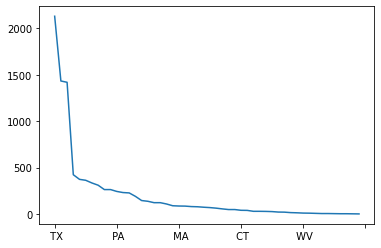

In [22]:
df.carLocationState.value_counts().plot()

## Car color

In [23]:
print(df.carColorIn.unique())
print(df.carColorEx.unique())

['Black' 'Gray' 'Unknown' 'Brown' 'Beige' 'Blue' 'Red' 'White' 'Orange']
['Silver' 'White' 'Red' 'Gray' 'Blue' 'Black' 'Unknown' 'Maroon' 'Brown'
 'Purple' 'Gold' 'Tan' 'Green' 'Orange' 'Yellow']


In [24]:
print("carColorIn")
print(df.carColorIn.value_counts())
print("carColorEx")
print(df.carColorEx.value_counts())

carColorIn
Black      6374
Gray       2142
Unknown     691
Beige       501
Brown       186
Red          41
White        20
Blue         10
Orange        1
Name: carColorIn, dtype: int64
carColorEx
White      3456
Black      2787
Gray       1573
Silver     1103
Red         523
Blue        456
Unknown      20
Brown        16
Gold         14
Tan           7
Green         5
Maroon        3
Purple        1
Orange        1
Yellow        1
Name: carColorEx, dtype: int64


**which are Unknown out color?**<br/>
I assumed Unknown indoor color to Black<br/>
But for those data which they out color is not reported<br/>
1- we can drop them <br/>
2- collecting data again <br/>

In [25]:
df.loc[df['carColorEx'] == "Unknown"]

,carName,carCompany,carAge,carGear,carPrice,carMile,carLocationCity,carLocationState,carColorEx,carColorIn,carAccident,carOwner,carUsage
555,Toyota RAV4,Toyota,4,XLE FWD,22495,39181,Daytona Beach,FL,Unknown,Unknown,0,1,Personal
583,Ford F-150,Ford,4,XLT SuperCrew 5.5' Box 4WD,34995,52254,Billings,MT,Unknown,Unknown,0,2,Personal
847,Toyota RAV4,Toyota,4,XLE FWD,20800,64115,Daytona Beach,FL,Unknown,Black,0,2,Personal
2009,Ford F-150,Ford,4,XLT SuperCrew 5.5' Box 4WD,31300,83909,Zionsville,IN,Unknown,Unknown,0,4,Personal
2938,Ford F-150,Ford,4,XLT SuperCrew 5.5' Box 4WD,33777,80679,Tallassee,AL,Unknown,Unknown,0,2,Personal
3253,Ford F-150,Ford,8,XLT SuperCrew 5.5' Box 4WD,17988,159403,Belton,TX,Unknown,Unknown,0,1,Personal
3257,Honda Civic,Honda,4,LX Sedan CVT,16800,58582,Sunnyvale,CA,Unknown,Black,1,3,Personal
5575,Mercedes-Benz C-Class,Mercedes-Benz,4,C 300 Sedan RWD,29736,30306,El Cajon,CA,Unknown,Unknown,0,2,Personal
5675,Ford Super Duty F-250,Ford,3,Lariat 4WD Crew Cab 6.75' Box,54155,44057,Macon,GA,Unknown,Black,0,1,Personal
6521,Ford F-150,Ford,7,Lariat SuperCrew 5.5' Box 4WD,24788,166388,Belton,TX,Unknown,Unknown,0,1,Personal


In [26]:
df['carColorIn'].replace({"Unknown":"Black"}, inplace=True)

In [27]:
df.loc[df.carColorEx == 'Unknown'].index

Int64Index([ 555,  583,  847, 2009, 2938, 3253, 3257, 5575, 5675, 6521, 8009,
            8053, 8453, 8581, 8782, 9028, 9110, 9294, 9306, 9719],
           dtype='int64')

In [28]:
unknownCarColorEx = df[df['carColorEx'] == 'Unknown'].index.to_numpy()
unknownCarColorEx

array([ 555,  583,  847, 2009, 2938, 3253, 3257, 5575, 5675, 6521, 8009,
       8053, 8453, 8581, 8782, 9028, 9110, 9294, 9306, 9719], dtype=int64)

**How to drop specific rows:** <br>
df.drop('c') --c is index <br/>
update_df = df.drop([df.index[1], df.index[2]])

In [29]:
dfNew = df.drop(unknownCarColorEx)

In [30]:
print("carColorIn")
print(dfNew.carColorIn.value_counts())
print("carColorEx")
print(dfNew.carColorEx.value_counts())

carColorIn
Black     7046
Gray      2141
Beige      501
Brown      186
Red         41
White       20
Blue        10
Orange       1
Name: carColorIn, dtype: int64
carColorEx
White     3456
Black     2787
Gray      1573
Silver    1103
Red        523
Blue       456
Brown       16
Gold        14
Tan          7
Green        5
Maroon       3
Purple       1
Orange       1
Yellow       1
Name: carColorEx, dtype: int64


## Car carAccident
in here, have to go deep, what is difference between 4 accident and
more accident how many prices are different

In [31]:
dfNew.carAccident.value_counts()

0    8506
1    1258
2     160
3      18
4       3
5       1
Name: carAccident, dtype: int64

In [32]:
dfNew.loc[df["carAccident"] == 4]

,carName,carCompany,carAge,carGear,carPrice,carMile,carLocationCity,carLocationState,carColorEx,carColorIn,carAccident,carOwner,carUsage
2722,Jaguar S-TYPE,Jaguar,14,3.0L,5995,148521,Miami,FL,White,Black,4,1,Personal
2992,Chevrolet Camaro,Chevrolet,7,LS with 2LS Coupe,14996,82601,Palm Coast,FL,Black,Black,4,2,Personal
8633,Ford F-150,Ford,13,FX4 SuperCab 6.5' Box 4WD,8995,146907,Sterling Heights,MI,Red,Black,4,1,Personal


In [33]:
print(dfNew.carAge.value_counts(),
      dfNew.carAge.describe())

4     4083
3     2696
2      981
5      776
6      429
7      386
8      249
9      155
10      42
1       41
11      22
12      16
15      13
14      12
16      12
13       7
19       7
18       5
23       3
24       3
17       2
22       2
25       2
21       1
20       1
Name: carAge, dtype: int64 count    9946.000000
mean        4.122160
std         1.918358
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max        25.000000
Name: carAge, dtype: float64


In [34]:
dfNew[dfNew["carName"] == "Chevrolet Camaro"]

,carName,carCompany,carAge,carGear,carPrice,carMile,carLocationCity,carLocationState,carColorEx,carColorIn,carAccident,carOwner,carUsage
1005,Chevrolet Camaro,Chevrolet,5,LT with 1LT Coupe,23901,77393,Corpus Christi,TX,White,Black,1,1,Personal
1490,Chevrolet Camaro,Chevrolet,8,LT with 1LT Coupe,14995,61376,Leesburg,FL,Silver,Black,1,2,Personal
1755,Chevrolet Camaro,Chevrolet,4,LT with 1LT Coupe,24900,50225,El Paso,TX,Black,Gray,0,1,Personal
2730,Chevrolet Camaro,Chevrolet,7,LT with 1LT Coupe,14999,65076,Houston,TX,Blue,Black,1,3,Personal
2992,Chevrolet Camaro,Chevrolet,7,LS with 2LS Coupe,14996,82601,Palm Coast,FL,Black,Black,4,2,Personal
3619,Chevrolet Camaro,Chevrolet,12,SS with 2SS Coupe,25498,7386,San Antonio,TX,Black,Black,0,1,Personal
5634,Chevrolet Camaro,Chevrolet,5,LT with 1LT Coupe,24000,65811,San Antonio,TX,White,Black,0,1,Personal
5776,Chevrolet Camaro,Chevrolet,4,LT with 1LT Coupe,18999,37680,Lighthouse Point,FL,White,Black,1,5,Fleet
5945,Chevrolet Camaro,Chevrolet,4,LT with 1LT Coupe,23488,91866,Denison,TX,White,Black,0,1,Personal
5946,Chevrolet Camaro,Chevrolet,7,Z/28 Coupe,54999,13332,Webster,TX,Black,Black,0,1,Personal


In [35]:
selectedDf= dfNew[dfNew["carName"] == "Ford F-150"]

In [36]:
selectedDf[selectedDf["carAge"] > 10]

,carName,carCompany,carAge,carGear,carPrice,carMile,carLocationCity,carLocationState,carColorEx,carColorIn,carAccident,carOwner,carUsage
1406,Ford F-150,Ford,11,Lariat SuperCrew 5.5' Box 4WD,13995,132575,Midlothian,IL,Black,Black,0,2,Personal
2649,Ford F-150,Ford,11,King Ranch SuperCrew 5.5' Box 2WD,18895,99059,San Antonio,TX,Black,Brown,0,2,Personal
3693,Ford F-150,Ford,11,XLT SuperCrew 5.5' Box 4WD,10986,197308,Fort Dodge,IA,Gray,Gray,0,2,Fleet
5277,Ford F-150,Ford,11,XLT SuperCrew 5.5' Box 4WD,18900,103485,Abilene,TX,Silver,Black,0,1,Personal
5315,Ford F-150,Ford,11,XL SuperCrew 5.5' Box 4WD,14125,139115,Parma,OH,Black,Black,0,5,Fleet
6287,Ford F-150,Ford,12,XL SuperCrew 5.5' Box 4WD,14000,129597,Pikeville,KY,White,Black,0,2,Personal
7523,Ford F-150,Ford,12,FX4 SuperCrew 5.5' Box 4WD,10990,171230,Wooster,OH,Blue,Black,0,1,Personal
8497,Ford F-150,Ford,15,STX Supercab 5.5' Box 2WD,7799,53611,Houston,TX,White,Gray,1,1,Fleet
8633,Ford F-150,Ford,13,FX4 SuperCab 6.5' Box 4WD,8995,146907,Sterling Heights,MI,Red,Black,4,1,Personal


## carUsage make it dummies variable

In [37]:
dfNew.carUsage.value_counts()

Personal    8427
Fleet       1519
Name: carUsage, dtype: int64

In [38]:
dfNew['carUsage'].replace({"Fleet":0}, inplace= True)
dfNew['carUsage'].replace({"Personal":1}, inplace= True)
dfNew['carUsage'].value_counts()

1    8427
0    1519
Name: carUsage, dtype: int64

With brief check I can say they are right

# Another time check all data for starting ML

In [39]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9946 entries, 0 to 9965
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   carName           9946 non-null   object
 1   carCompany        9946 non-null   object
 2   carAge            9946 non-null   int64 
 3   carGear           9946 non-null   object
 4   carPrice          9946 non-null   int64 
 5   carMile           9946 non-null   int64 
 6   carLocationCity   9946 non-null   object
 7   carLocationState  9946 non-null   object
 8   carColorEx        9946 non-null   object
 9   carColorIn        9946 non-null   object
 10  carAccident       9946 non-null   int64 
 11  carOwner          9946 non-null   object
 12  carUsage          9946 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [40]:
for i in range(0, len(df.columns)):
    data_describe = df.iloc[:, i].describe()
    print(str("\n") + "--" * 7 + str(dfNew.columns[i]) + "--" * 7)
    print(data_describe)


--------------carName--------------
count           9966
unique           212
top       Ford F-150
freq            2198
Name: carName, dtype: object

--------------carCompany--------------
count     9966
unique      42
top       Ford
freq      3432
Name: carCompany, dtype: object

--------------carAge--------------
count    9966.000000
mean        4.123721
std         1.918261
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max        25.000000
Name: carAge, dtype: float64

--------------carGear--------------
count                           9966
unique                           959
top       XLT SuperCrew 5.5' Box 4WD
freq                            1162
Name: carGear, dtype: object

--------------carPrice--------------
count      9966.000000
mean      28734.512041
std       11102.387382
min        1500.000000
25%       19993.250000
50%       27999.000000
75%       36952.000000
max      101586.000000
Name: carPrice, dtype: float64

--------------car

Drop feature ==> df.drop(['C', 'D'], axis = 1)<br>
carName, carGear, carLocationCity, carColorIn

In [41]:
dfMl = dfNew.drop(["carName","carGear","carLocationCity","carLocationState","carColorIn"], axis=1)
dfMl.columns

Index(['carCompany', 'carAge', 'carPrice', 'carMile', 'carColorEx',
       'carAccident', 'carOwner', 'carUsage'],
      dtype='object')

# Visualization

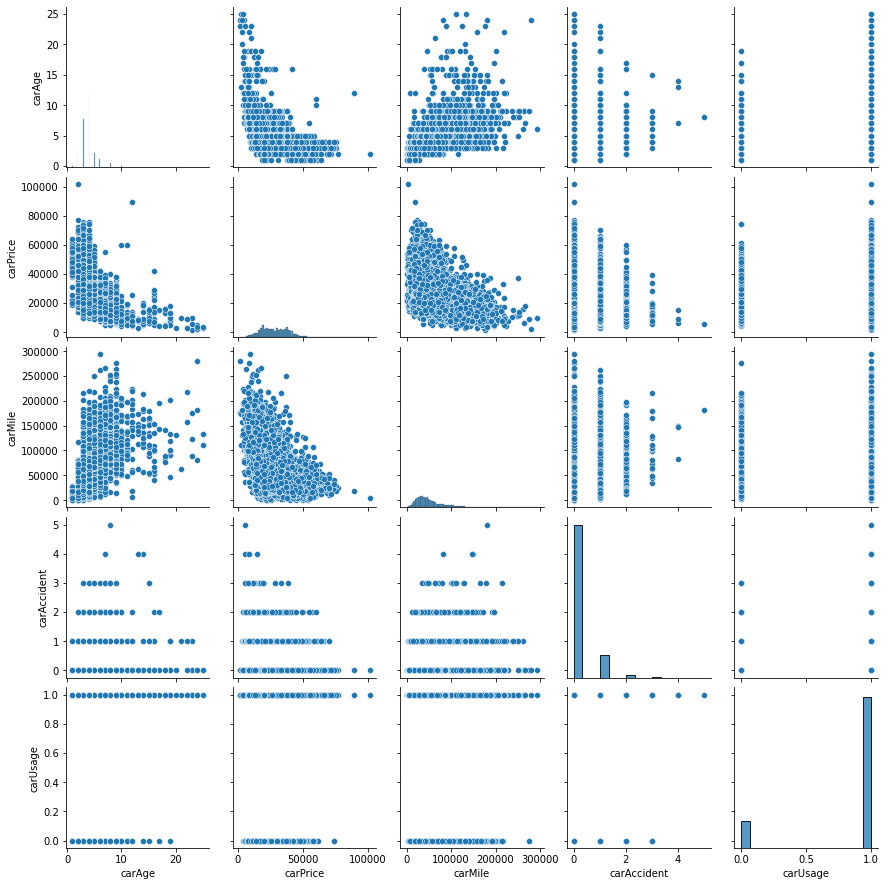

In [42]:
sb.pairplot(dfMl)

In [43]:
from pandas_profiling import ProfileReport

In [44]:
#profile = ProfileReport(dfMl)
#profile.to_file("OperatingSystems")

Deal with car name

In [45]:
len(set(dfMl.carCompany.values))
len(dfMl.carCompany.value_counts().index)

42

In [46]:
dfMl.carCompany.value_counts()

Ford             3417
Chevrolet        1466
Toyota            933
Nissan            736
Jeep              728
Ram               527
Mercedes-Benz     400
Honda             349
Kia               205
BMW               189
GMC               185
Hyundai           163
Dodge             160
Volkswagen        126
Lexus              73
Chrysler           59
INFINITI           51
Buick              35
Cadillac           22
Mazda              22
Subaru             15
Audi               12
Tesla               9
Acura               7
Lincoln             7
smart               6
Volvo               6
FIAT                5
Land                5
Mitsubishi          5
Porsche             5
Genesis             4
Bentley             3
Aston               2
HUMMER              2
Saturn              1
Suzuki              1
Jaguar              1
Mercury             1
Scion               1
Plymouth            1
Pontiac             1
Name: carCompany, dtype: int64

D:\PhD\Python\Swebinar\webScraping\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\34657\AppData\Local\Temp/ipykernel_31772/3253247073.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


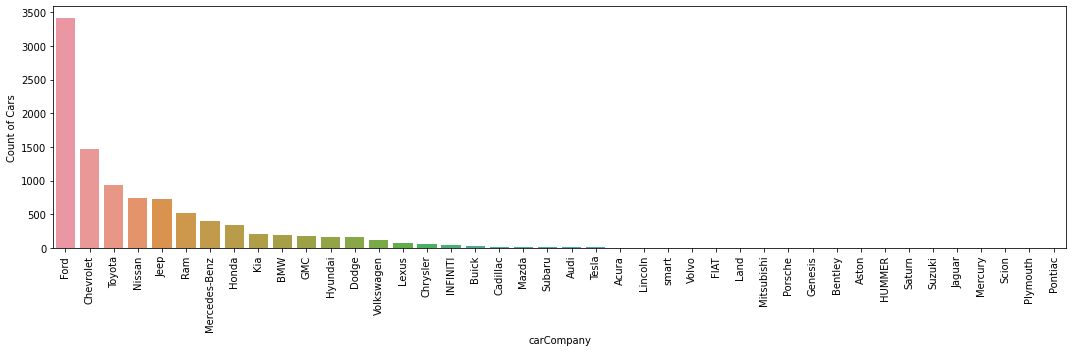

In [47]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sb.countplot(dfMl['carCompany'], order=pd.value_counts(df['carCompany']).index,)
plt1.set(xlabel = 'carCompany', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

Most of the car are Ford !!!! and Cars company not distributed appropriate, <br/>
Because price might be difference

In [48]:
dfMl[dfMl["carCompany"] == "Ford"].carPrice.describe()

count     3417.000000
mean     32087.083699
std      11159.212110
min       4888.000000
25%      23998.000000
50%      33000.000000
75%      39000.000000
max      75901.000000
Name: carPrice, dtype: float64

In [49]:
dfMl.carPrice.describe()

count      9946.000000
mean      28738.375930
std       11103.497078
min        1500.000000
25%       19993.250000
50%       27999.000000
75%       36965.250000
max      101586.000000
Name: carPrice, dtype: float64

Ford's price are not separated maybe it helps, <br>
but I want to try to describe it more base on relevant price

In [50]:
dfAvePrice = dfMl[['carCompany','carPrice']].groupby("carCompany",
    as_index = False).mean().rename(columns={'carPrice':'avCarPrice'})
dfAvePrice

,carCompany,avCarPrice
0,Acura,17636.428571
1,Aston,59995.000000
2,Audi,25917.666667
3,BMW,30275.910053
4,Bentley,52838.333333
5,Buick,18486.514286
6,Cadillac,27606.954545
7,Chevrolet,30284.279673
8,Chrysler,17760.169492
9,Dodge,22699.781250


C:\Users\34657\AppData\Local\Temp/ipykernel_31772/1381573516.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


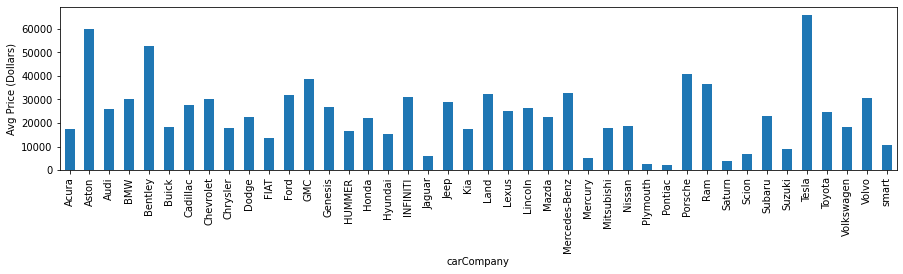

In [51]:
plt1 = dfAvePrice.plot(x = 'carCompany', kind='bar',legend = False,
                              sort_columns = True, figsize = (15,3))
plt1.set_xlabel("carCompany")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

In [52]:
dfAvePrice.avCarPrice.describe()

count       42.000000
mean     23994.174724
std      14141.840022
min       2000.000000
25%      16767.674390
50%      22744.025758
75%      30423.944918
max      65990.111111
Name: avCarPrice, dtype: float64

In [53]:
dfMlCa = dfMl.merge(dfAvePrice, on = "carCompany")
dfMlCa

,carCompany,carAge,carPrice,carMile,carColorEx,carAccident,carOwner,carUsage,avCarPrice
0,Toyota,5,33987,46375,Silver,1,2,1,24625.526259
1,Toyota,3,30499,42270,Silver,0,2,1,24625.526259
2,Toyota,2,19935,35454,White,0,1,1,24625.526259
3,Toyota,2,18499,51474,Black,1,1,1,24625.526259
4,Toyota,3,40457,26582,White,0,1,1,24625.526259
...,...,...,...,...,...,...,...,...,...
9941,smart,6,8995,36064,White,0,1,1,10584.500000
9942,smart,6,8995,36113,White,0,1,1,10584.500000
9943,smart,6,8995,36057,White,0,1,1,10584.500000
9944,Saturn,18,3995,141736,White,0,4,1,3995.000000


In [54]:
dfMlCa["carCompanyCategory"]= dfMlCa['avCarPrice'].apply(lambda x : "Budget" if x < 10000
                else ("Mid_Range" if 10000 <= x < 40000
                else "Luxury"))
dfMlCa

,carCompany,carAge,carPrice,carMile,carColorEx,carAccident,carOwner,carUsage,avCarPrice,carCompanyCategory
0,Toyota,5,33987,46375,Silver,1,2,1,24625.526259,Mid_Range
1,Toyota,3,30499,42270,Silver,0,2,1,24625.526259,Mid_Range
2,Toyota,2,19935,35454,White,0,1,1,24625.526259,Mid_Range
3,Toyota,2,18499,51474,Black,1,1,1,24625.526259,Mid_Range
4,Toyota,3,40457,26582,White,0,1,1,24625.526259,Mid_Range
...,...,...,...,...,...,...,...,...,...,...
9941,smart,6,8995,36064,White,0,1,1,10584.500000,Mid_Range
9942,smart,6,8995,36113,White,0,1,1,10584.500000,Mid_Range
9943,smart,6,8995,36057,White,0,1,1,10584.500000,Mid_Range
9944,Saturn,18,3995,141736,White,0,4,1,3995.000000,Budget


In [55]:
dfMlCa.drop(["avCarPrice"], axis=1, inplace=True)

In [56]:
dfMlCa[dfMlCa.carCompanyCategory == "Luxury"]

,carCompany,carAge,carPrice,carMile,carColorEx,carAccident,carOwner,carUsage,carCompanyCategory
9872,Tesla,4,43153,18552,White,1,2,1,Luxury
9873,Tesla,4,58590,26152,Gray,0,1,1,Luxury
9874,Tesla,4,59400,27616,White,0,2,0,Luxury
9875,Tesla,4,73995,39304,Black,0,1,0,Luxury
9876,Tesla,4,73995,38734,Silver,0,1,0,Luxury
9877,Tesla,4,60888,44172,Black,0,2,1,Luxury
9878,Tesla,4,73995,39737,Silver,0,1,0,Luxury
9879,Tesla,4,75900,18752,Black,0,1,1,Luxury
9880,Tesla,4,73995,33126,Silver,0,1,0,Luxury
9903,Aston,10,59995,50575,White,2,3,1,Luxury


In [57]:
dfMlCa.columns

Index(['carCompany', 'carAge', 'carPrice', 'carMile', 'carColorEx',
       'carAccident', 'carOwner', 'carUsage', 'carCompanyCategory'],
      dtype='object')

With this assumption we want to model car price based on:<br/>
With *carCompanyAve* instead of name

In [58]:
dfMlCa.drop(["carCompany"], axis=1, inplace=True)

In [59]:
dfMlCa.carColorEx.value_counts()
dfMlCa["carOwner"].astype(np.int)
dfMlCa["carOwner"] = dfMlCa["carOwner"].astype(np.int)

C:\Users\34657\AppData\Local\Temp/ipykernel_31772/3258905932.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dfMlCa["carOwner"].astype(np.int)
C:\Users\34657\AppData\Local\Temp/ipykernel_31772/3258905932.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note l

In [60]:
dfDummies = pd.get_dummies(dfMlCa)
dfDummies.columns

Index(['carAge', 'carPrice', 'carMile', 'carAccident', 'carOwner', 'carUsage',
       'carColorEx_Black', 'carColorEx_Blue', 'carColorEx_Brown',
       'carColorEx_Gold', 'carColorEx_Gray', 'carColorEx_Green',
       'carColorEx_Maroon', 'carColorEx_Orange', 'carColorEx_Purple',
       'carColorEx_Red', 'carColorEx_Silver', 'carColorEx_Tan',
       'carColorEx_White', 'carColorEx_Yellow', 'carCompanyCategory_Budget',
       'carCompanyCategory_Luxury', 'carCompanyCategory_Mid_Range'],
      dtype='object')

In [61]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [62]:
train, test = train_test_split(dfDummies, test_size=0.2)

In [63]:
print(test.describe())
print("----"*20)
print(train.describe())
print("----"*20)
print(test.info())

            carAge      carPrice        carMile  carAccident     carOwner  \
count  1990.000000   1990.000000    1990.000000  1990.000000  1990.000000   
mean      4.085427  28951.915075   53958.027136     0.148744     1.411055   
std       1.992883  11223.902422   35210.899800     0.425419     0.661274   
min       1.000000   2000.000000     499.000000     0.000000     1.000000   
25%       3.000000  19995.000000   30283.000000     0.000000     1.000000   
50%       4.000000  28204.500000   44980.500000     0.000000     1.000000   
75%       4.000000  36988.000000   68583.500000     0.000000     2.000000   
max      25.000000  73995.000000  279213.000000     5.000000     6.000000   

          carUsage  carColorEx_Black  carColorEx_Blue  carColorEx_Brown  \
count  1990.000000       1990.000000      1990.000000       1990.000000   
mean      0.833166          0.288442         0.043216          0.000503   
std       0.372921          0.453152         0.203394          0.022417   
min   

In [64]:
testX = test.drop(columns=["carPrice"])
testY = test["carPrice"]
trainX = train.drop(columns=["carPrice"])
trainY = train["carPrice"]

In [65]:
dtr = DecisionTreeRegressor()
dtr.fit(trainX, trainY)
dtr_prediction = dtr.predict(testX)
print("Decision Tree")
print(mean_absolute_error(testY, dtr_prediction))
print(dtr.score(testX, testY))

Decision Tree
10577.079899497487
-0.47443265599206597


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge

In [67]:
lr = LinearRegression()

In [69]:
lr.fit(testX, testY)

array([-1.11031863e+03, -8.82247314e-02, -2.21263170e+03, -1.23584449e+03,
        2.79722356e+03, -5.42102643e+01, -1.55206739e+03,  5.93891864e+03,
       -1.41345746e+03, -1.79533401e+03,  1.81898940e-12, -1.09139364e-11,
       -9.09494702e-13,  1.13686838e-13,  9.90402238e+02, -2.01785490e+03,
        0.00000000e+00, -9.63968521e+01,  0.00000000e+00, -5.72752615e+03,
        2.07028845e+04, -1.49753583e+04])

In [71]:
print(lr.coef_)
print(lr.intercept_)
print(lr.score(testX, testY))

[-1.11031863e+03 -8.82247314e-02 -2.21263170e+03 -1.23584449e+03
  2.79722356e+03 -5.42102643e+01 -1.55206739e+03  5.93891864e+03
 -1.41345746e+03 -1.79533401e+03  1.81898940e-12 -1.09139364e-11
 -9.09494702e-13  1.13686838e-13  9.90402238e+02 -2.01785490e+03
  0.00000000e+00 -9.63968521e+01  0.00000000e+00 -5.72752615e+03
  2.07028845e+04 -1.49753583e+04]
53438.433572729744
0.2577186746005835


In [ ]:
mean_absolute_error(y, yhat)

In [75]:
yhat = lr.predict(testX)
np.sqrt(mean_squared_error(testY, yhat))

9667.607345653647

In [78]:
r = Ridge(alpha=1)
r.fit(trainX, trainY)

Ridge(alpha=1)

In [80]:
yhat_test = r.predict(testX)
yhat_test.shape

(1990,)

In [81]:
r2_score(testY, yhat_test), mean_absolute_error(testY, yhat_test)

(0.25536024736145235, 8060.974188894755)